Notebook to compare HYCOM and NOAA

In [4]:
import grab_HYCOM

import matplotlib.pyplot as plt

from salishsea_tools.nowcast import analyze, residuals, figures
import datetime

%matplotlib inline

In [23]:
def compare_HYCOM_NOAA(date):
    """ 
    Compares the HYCMO and NOAA ssh anomaly forecasts for a date.
    Observations are also plotted"""
    
    fig, ax = plt.subplots(1,1,figsize = (10,5))
    
    # get NOAA first
    filename_NB, run_date = analyze.create_path('forecast', date, 'ssh*.txt')
    data = residuals._load_surge_data(filename_NB)
    surge_NB, dates_NB = residuals._retrieve_surge(data, run_date)
    
    # now get HYCOM
    filename_HY = '/data/nsoontie/MEOPAR/analysis/Nancy/nowcast/{}/hycom_1934_1661.txt'.format(date.strftime('%Y-%m-%d'))
    data, lon, lot = grab_HYCOM.parse_hycom_text(filename_HY)
    surge_HY = data['ssh']
    dates_HY = data['time']
    
    #now get observations
    end = date + datetime.timedelta(days=1)
    obs = figures.get_NOAA_wlevels(
        figures.SITES['Neah Bay']['stn_no'], date.strftime('%d-%b-%Y'), end.strftime('%d-%b-%Y')
    )
    tides = figures.get_NOAA_tides(
        figures.SITES['Neah Bay']['stn_no'], date.strftime('%d-%b-%Y'), end.strftime('%d-%b-%Y')
    )
    res_obs = residuals.calculate_residual(obs.wlev, obs.time, tides.pred, tides.time)
    
    #interpolate NOAA and obs to HYCOM times
    #surge_NB = figures.interp_to_model_time(dates_HY, surge_NB, dates_NB)
    #res_obs = figures.interp_to_model_time(dates_HY, res_obs, obs.time)
    
    #plotting
    ax.plot(dates_NB,surge_NB,'o-',label = 'NOAA')
    ax.plot(dates_HY,surge_HY,'o-',label = 'HYCOM')
    ax.plot(obs.time,res_obs,'o-',label = 'Observations')
    
    #labels etc
    ax.set_ylabel('SSH anomalu [m]')
    ax.legend(loc=0)
    ax.grid()
    ax.set_xlim([date,end])
    
    return fig

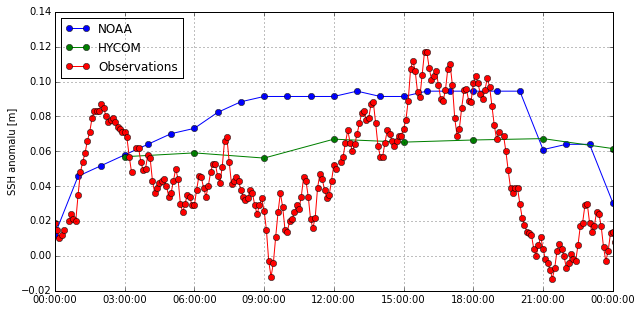

In [24]:
date = datetime.datetime(2015,7,24)
fig = compare_HYCOM_NOAA(date)

HYCOM doesn't have the first time point but this may be an artifact of parsing.

Maybe average NOAA/obs over 3 hours?

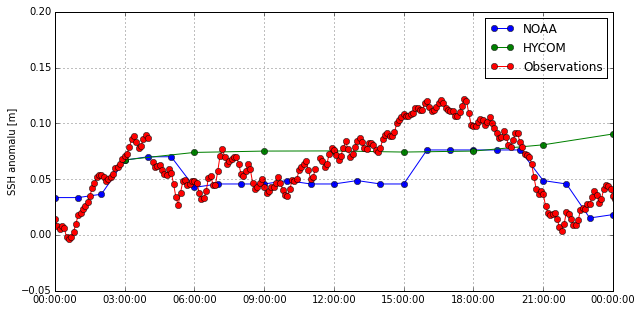

In [25]:
date = datetime.datetime(2015,7,25)
fig = compare_HYCOM_NOAA(date)

Sometimes NOAA/HYCOM match and sometimes they don't..?

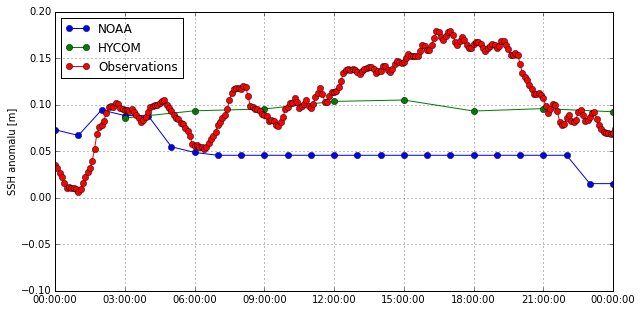

In [26]:
date = datetime.datetime(2015,7,26)
fig = compare_HYCOM_NOAA(date)

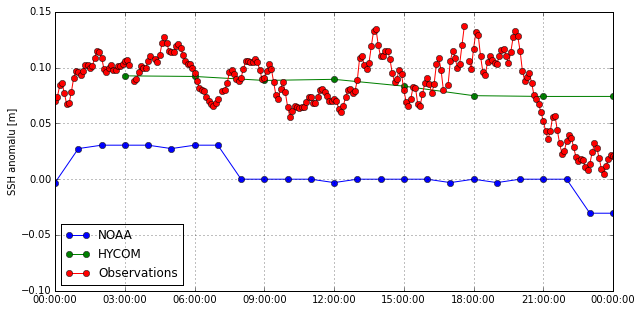

In [27]:
date = datetime.datetime(2015,7,27)
fig = compare_HYCOM_NOAA(date)

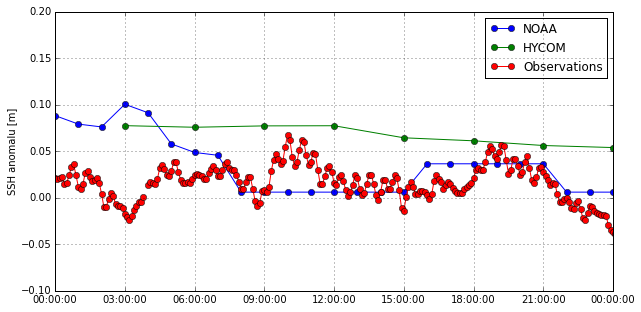

In [28]:
date = datetime.datetime(2015,7,28)
fig = compare_HYCOM_NOAA(date)

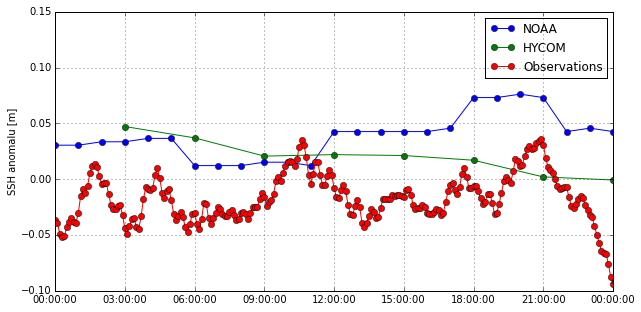

In [29]:
date = datetime.datetime(2015,7,29)
fig = compare_HYCOM_NOAA(date)

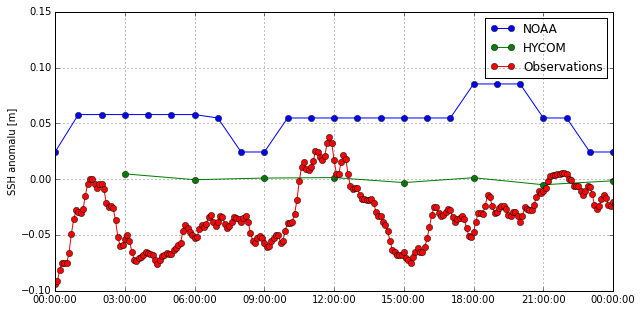

In [30]:
date = datetime.datetime(2015,7,30)
fig = compare_HYCOM_NOAA(date)